In [1]:
import nltk
import numpy as np
import csv
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import matplotlib
from matplotlib import pyplot as plt
# import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
stop_words = set(stopwords.words("english"))

In [10]:
data = pd.read_csv('reviews_ioCombined.csv')
print ("Original 'JLAllPages.csv' CSV Data: \n")
data

Original 'JLAllPages.csv' CSV Data: 



,AUTHOR,COMMENT,RATING,TIME
0,Anonymous,“\nAbsolutely disgusting with the treatment I ...,1,Posted 8 hours ago
1,Claire,“\nOnly I can’t give it a zero review I bloody...,1,Posted 16 hours ago
2,Julie Thompson,“\nI have given them a 1 star but they deserve...,1,Posted 22 hours ago
3,Lillia Belaloui,“\nI have bought a second hand I phone with gi...,4,Posted 1 day ago
4,Kim Vernon,“\nZoie and Kieran at cex in Milton Keynes mad...,5,Posted 3 days ago
...,...,...,...,...
515,Anonymous,“\nUnfortunately I am unable to give no star s...,1,Posted 4 years ago
516,Martyn Horton,“\nStore has quality 2cnd hand items for sale ...,5,Posted 4 years ago
517,Diane Haywood,“\nStaff are always friendly and knowledgeable...,5,Posted 4 years ago
518,Andrejs Pokovba,“\nThese guys are selling used and cheap items...,1,Posted 4 years ago


In [15]:
from csv import reader

outfile = open("Reviews_io.txt", "w")
with open('reviews_ioCombined.csv', 'r', encoding ='utf-8') as csvfile:
    reader = csv.DictReader(csvfile)
    
    for row in reader:
        review = (row['COMMENT'])
        print (review)
        line = "{}\n".format(review)
        outfile.write(review)

“
Absolutely disgusting with the treatment I received in the cex shop in Cavan Ireland. Bought a phone here with disabled shortly after purchase. Brought it back to be rudely told they couldn’t do anything that I’d have to bring it to repair shop.did so and man in repair shop told me it was faulty and bring it back to cex and don’t let them fob you off. Went back to cex to be fobbed off. Only by another person who spoke to me like I was a two year old. Again never looked at phone only have me same speech the last lad did. It’s like there trained to do tell the same thing to all. Was absolutely disgusted. These are young people trained to lie. They have not heard the last from me. This shop needs highlighting and should not be allowed rip people off like they do. I say shut them down.
”
“
Only I can’t give it a zero review I bloody well would!!!! I bought a phone in my local CEX store on the 2/12/21 the phone hadnt been working from I got it the speaker was not working right probably do

UnicodeEncodeError: 'charmap' codec can't encode character '\U0001f644' in position 446: character maps to <undefined>

In [23]:
review = open ("Reviews_io.txt")

In [24]:
reviews=review.read()
reviews

"“\nAbsolutely disgusting with the treatment I received in the cex shop in Cavan Ireland. Bought a phone here with disabled shortly after purchase. Brought it back to be rudely told they couldn’t do anything that I’d have to bring it to repair shop.did so and man in repair shop told me it was faulty and bring it back to cex and don’t let them fob you off. Went back to cex to be fobbed off. Only by another person who spoke to me like I was a two year old. Again never looked at phone only have me same speech the last lad did. It’s like there trained to do tell the same thing to all. Was absolutely disgusted. These are young people trained to lie. They have not heard the last from me. This shop needs highlighting and should not be allowed rip people off like they do. I say shut them down.\n”“\nOnly I can’t give it a zero review I bloody well would!!!! I bought a phone in my local CEX store on the 2/12/21 the phone hadnt been working from I got it the speaker was not working right probably

In [25]:
reviews_token = nltk.word_tokenize(reviews)
reviews_token

['“',
 'Absolutely',
 'disgusting',
 'with',
 'the',
 'treatment',
 'I',
 'received',
 'in',
 'the',
 'cex',
 'shop',
 'in',
 'Cavan',
 'Ireland',
 '.',
 'Bought',
 'a',
 'phone',
 'here',
 'with',
 'disabled',
 'shortly',
 'after',
 'purchase',
 '.',
 'Brought',
 'it',
 'back',
 'to',
 'be',
 'rudely',
 'told',
 'they',
 'couldn',
 '’',
 't',
 'do',
 'anything',
 'that',
 'I',
 '’',
 'd',
 'have',
 'to',
 'bring',
 'it',
 'to',
 'repair',
 'shop.did',
 'so',
 'and',
 'man',
 'in',
 'repair',
 'shop',
 'told',
 'me',
 'it',
 'was',
 'faulty',
 'and',
 'bring',
 'it',
 'back',
 'to',
 'cex',
 'and',
 'don',
 '’',
 't',
 'let',
 'them',
 'fob',
 'you',
 'off',
 '.',
 'Went',
 'back',
 'to',
 'cex',
 'to',
 'be',
 'fobbed',
 'off',
 '.',
 'Only',
 'by',
 'another',
 'person',
 'who',
 'spoke',
 'to',
 'me',
 'like',
 'I',
 'was',
 'a',
 'two',
 'year',
 'old',
 '.',
 'Again',
 'never',
 'looked',
 'at',
 'phone',
 'only',
 'have',
 'me',
 'same',
 'speech',
 'the',
 'last',
 'lad',
 'did'

In [27]:
norm = [word.lower()for word in reviews_token if word.isalpha()]
norm

['absolutely',
 'disgusting',
 'with',
 'the',
 'treatment',
 'i',
 'received',
 'in',
 'the',
 'cex',
 'shop',
 'in',
 'cavan',
 'ireland',
 'bought',
 'a',
 'phone',
 'here',
 'with',
 'disabled',
 'shortly',
 'after',
 'purchase',
 'brought',
 'it',
 'back',
 'to',
 'be',
 'rudely',
 'told',
 'they',
 'couldn',
 't',
 'do',
 'anything',
 'that',
 'i',
 'd',
 'have',
 'to',
 'bring',
 'it',
 'to',
 'repair',
 'so',
 'and',
 'man',
 'in',
 'repair',
 'shop',
 'told',
 'me',
 'it',
 'was',
 'faulty',
 'and',
 'bring',
 'it',
 'back',
 'to',
 'cex',
 'and',
 'don',
 't',
 'let',
 'them',
 'fob',
 'you',
 'off',
 'went',
 'back',
 'to',
 'cex',
 'to',
 'be',
 'fobbed',
 'off',
 'only',
 'by',
 'another',
 'person',
 'who',
 'spoke',
 'to',
 'me',
 'like',
 'i',
 'was',
 'a',
 'two',
 'year',
 'old',
 'again',
 'never',
 'looked',
 'at',
 'phone',
 'only',
 'have',
 'me',
 'same',
 'speech',
 'the',
 'last',
 'lad',
 'did',
 'it',
 's',
 'like',
 'there',
 'trained',
 'to',
 'do',
 'tell'

In [28]:
filtered_words = [word for word in norm if word not in stop_words]
filtered_words

['absolutely',
 'disgusting',
 'treatment',
 'received',
 'cex',
 'shop',
 'cavan',
 'ireland',
 'bought',
 'phone',
 'disabled',
 'shortly',
 'purchase',
 'brought',
 'back',
 'rudely',
 'told',
 'anything',
 'bring',
 'repair',
 'man',
 'repair',
 'shop',
 'told',
 'faulty',
 'bring',
 'back',
 'cex',
 'let',
 'fob',
 'went',
 'back',
 'cex',
 'fobbed',
 'another',
 'person',
 'spoke',
 'like',
 'two',
 'year',
 'old',
 'never',
 'looked',
 'phone',
 'speech',
 'last',
 'lad',
 'like',
 'trained',
 'tell',
 'thing',
 'absolutely',
 'disgusted',
 'young',
 'people',
 'trained',
 'lie',
 'heard',
 'last',
 'shop',
 'needs',
 'highlighting',
 'allowed',
 'rip',
 'people',
 'like',
 'say',
 'shut',
 'give',
 'zero',
 'review',
 'bloody',
 'well',
 'would',
 'bought',
 'phone',
 'local',
 'cex',
 'store',
 'phone',
 'hadnt',
 'working',
 'got',
 'speaker',
 'working',
 'right',
 'probably',
 'fact',
 'day',
 'got',
 'lad',
 'serving',
 'dropped',
 'counter',
 'took',
 'back',
 'today',
 '

In [32]:
fw_fd = nltk.FreqDist(filtered_words)
fw_fd

FreqDist({'cex': 50, 'back': 37, 'bought': 26, 'told': 23, 'store': 23, 'phone': 22, 'shop': 19, 'buy': 19, 'service': 19, 'get': 19, ...})

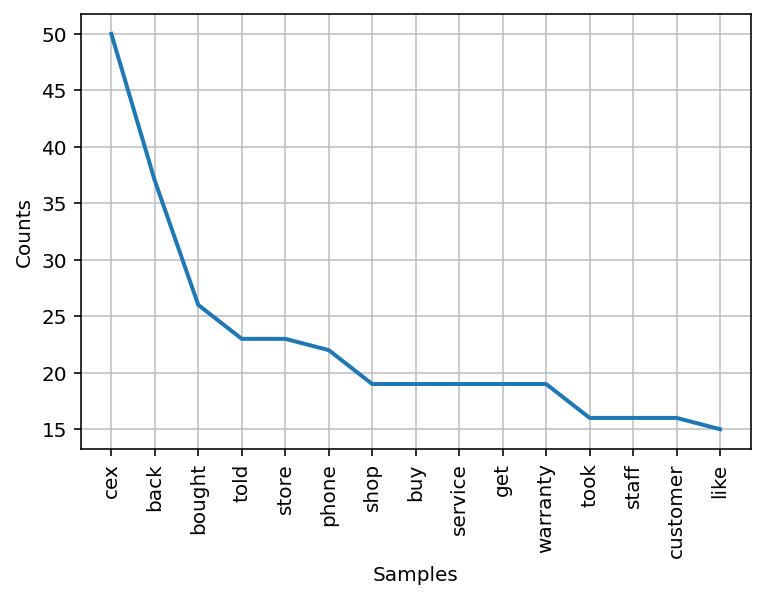

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [33]:
fw_fd.plot(15, cumulative=False)